# Giriş
Projem boyunca uyguladığım Makine öğrenimi modelleri:<br>
- Naive Bayes Classification
    - Gaussian Naive Bayes
    - Multinomial Naive Bayes
    - Bernoulli Naive Bayes
- Support Vector Machine Classification
- Logistic Regression
- K-Nearest Neighbors(KNN)
- Decision Tree Classification
- Random Forest Classification
    

# İçindekiler <a id = "cont"></a>
- [Veri Seti İncelemesi]
- [Veri Setini Hazırlama Aşaması]
- [2. Hazırlık Aşaması]
- [Makine Öğrenim Modelleri]
    - [Naive Bayes Classification]
    - [Support Vector Machine Classification]
    - [Logistic Regression]
    - [K-Nearest Neighbors(KNN)]
    - [Decision Tree Classification]
    - [Random Forest Classification]
- [Derin Öğrenme Modelleri]

- [Sonuç]

In [1]:
# Kullandığım Kütüphanelerim
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarıları görmezden gelme!
import warnings
warnings.filterwarnings("ignore")

# Veri Seti İncelemesi <a id = "1"></a>
[Go Content](#cont)

In [2]:
data = pd.read_csv("data/magaza_yorumlari_duygu_analizi.csv", encoding = "utf-16")

In [3]:
data.head(10)

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz
5,Giriş seviyesindeki kullanıcılar için kabul ed...,Tarafsız
6,kullanisli baya,Olumlu
7,Dezavantajlar : Pahalı ürün<br />Merhabalar bu...,Tarafsız
8,ÜRÜN GÜZEL BU PARALARA BAŞKA BULAMAZSINIZ,Tarafsız
9,Tasarım ve kalite iyi olmasına rağmen yazma hı...,Tarafsız


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429 entries, 0 to 11428
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   11426 non-null  object
 1   Durum   11429 non-null  object
dtypes: object(2)
memory usage: 178.7+ KB


In [5]:
data = data.dropna()

In [6]:
data

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz
...,...,...
11424,biraz fazla ısınıyor ama sorumsuz çalışıyor,Tarafsız
11425,orijinal ürün fakat ambalaj bize ulaşana kadar...,Tarafsız
11426,bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...,Olumsuz
11427,Bir sene olmadı ayar düğmesine basıyorum ekran...,Tarafsız


In [7]:
data = data.rename({'Görüş': 'Gorus'}, axis=1)

In [8]:
data.head()

,Gorus,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [9]:
data.columns

Index(['Gorus', 'Durum'], dtype='object')

In [10]:
data["Durum"].value_counts()

Durum
Olumlu      4252
Olumsuz     4237
Tarafsız    2937
Name: count, dtype: int64

Durum
Olumlu      4252
Olumsuz     4237
Tarafsız    2937
Name: count, dtype: int64


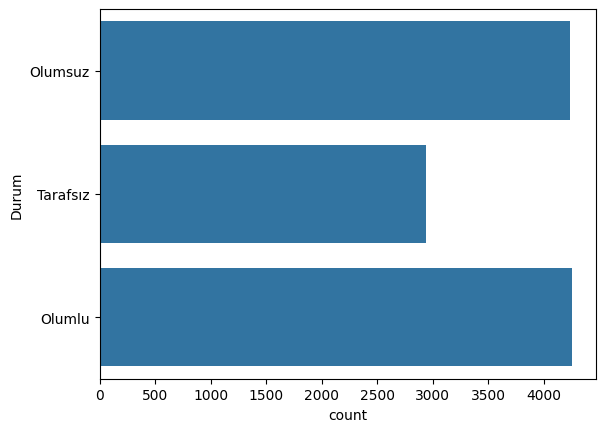

In [11]:
sns.countplot(data["Durum"])
print(data.Durum.value_counts())

In [12]:
data['Durum'] = data.loc[:, 'Durum'].map({'Olumlu' : 0, 'Olumsuz' : 1 , 'Tarafsız' : 2})

In [13]:
data

,Gorus,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",1
1,hizli teslimat tesekkürler,2
2,ses olayı süper....gece çalıştır sıkıntı yok.....,0
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,1
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,1
...,...,...
11424,biraz fazla ısınıyor ama sorumsuz çalışıyor,2
11425,orijinal ürün fakat ambalaj bize ulaşana kadar...,2
11426,bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...,1
11427,Bir sene olmadı ayar düğmesine basıyorum ekran...,2


In [14]:
data["Gorus"]

0        ses kalitesi ve ergonomisi rezalet, sony olduğ...
1                               hizli teslimat tesekkürler
2        ses olayı süper....gece çalıştır sıkıntı yok.....
3        geldi bigün kullandık hemen bozoldu hiçtavsiye...
4        Kulaklığın sesi kaliteli falan değil. Aleti öv...
                               ...                        
11424          biraz fazla ısınıyor ama sorumsuz çalışıyor
11425    orijinal ürün fakat ambalaj bize ulaşana kadar...
11426    bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...
11427    Bir sene olmadı ayar düğmesine basıyorum ekran...
11428    Urun kaliteli zamaninda tedlimat ve kullanisli...
Name: Gorus, Length: 11426, dtype: object

In [15]:
print(data["Gorus"][0] + "\n")
print(data["Gorus"][4000] + "\n")
print(data["Gorus"][4588] + "\n")

ses kalitesi ve ergonomisi rezalet, sony olduğu için aldım ama 4'de 1 fiyatına çin replika ürün alsaydım çok çok daha iyiydi, kesinlikle tavsiye etmiyorum.

Süpürge arayışınızı bitirmek ve bu konuyu kapatmak için tercihiniz olmalı. Anlatılmaz yaşanır bir temizlik gücü var. Parça ve aksamlar için şimdiden bir şey söylemek zor...Ancak anneme aldık, temizliğini görünce kendi süpürgemden soğudum :) Bundan sonraki süpürge tercihim olacak..

bir ay olmadan bozuldu



# Veri Setini Hazırlama Aşaması <a id = "2"></a>
[Go Content](#cont)

In [16]:
data

,Gorus,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",1
1,hizli teslimat tesekkürler,2
2,ses olayı süper....gece çalıştır sıkıntı yok.....,0
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,1
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,1
...,...,...
11424,biraz fazla ısınıyor ama sorumsuz çalışıyor,2
11425,orijinal ürün fakat ambalaj bize ulaşana kadar...,2
11426,bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...,1
11427,Bir sene olmadı ayar düğmesine basıyorum ekran...,2


In [17]:
data["Gorus"][125]

'ürün az önce elime geçti buradan aldım kargoyu zamanında yolladıkları için teşekkür ediyorum ama ürün hayal kırıklığı çok pişman oldum malzeme kalitesi bana göre iyi değil çekiş gücü süpürdüğünü bile farketmiyorum diyeceğim kadar komşumun 1200w süpürgesi bundan güzel çektiğini söyleyebilirim yorumlara bakarak ürünümün arızalı oldugunu bile düşünüyorum ama yinede tavsiye etmiyorum'

In [18]:
import re
cumle0 = data["Gorus"][125]
cumle1 = re.sub("[^a-zA-Z]", " ", cumle0)
cumle2 = cumle1.lower()

In [19]:
cumle2

' r n az  nce elime ge ti buradan ald m kargoyu zaman nda yollad klar  i in te ekk r ediyorum ama  r n hayal k r kl     ok pi man oldum malzeme kalitesi bana g re iyi de il  eki  g c  s p rd   n  bile farketmiyorum diyece im kadar kom umun     w s p rgesi bundan g zel  ekti ini s yleyebilirim yorumlara bakarak  r n m n ar zal  oldugunu bile d   n yorum ama yinede tavsiye etmiyorum'

In [20]:
listcumle0 = list(cumle0)
for i in range(0,len(listcumle0)):
    if listcumle0[i] == "ü":
        listcumle0[i] = "u"
    elif listcumle0[i] == "Ü":
        listcumle0[i] = "U"
    elif listcumle0[i] == "ö":
        listcumle0[i] = "o"
    elif listcumle0[i] == "Ö":
        listcumle0[i] = "O"
    elif listcumle0[i] == "İ":
        listcumle0[i] = "I"
    elif listcumle0[i] == "ç":
        listcumle0[i] = "c"
    elif listcumle0[i] == "Ç":
        listcumle0[i] = "C"
    elif listcumle0[i] == "ğ":
        listcumle0[i] = "g"
    elif listcumle0[i] == "Ğ":
        listcumle0[i] = "G"
    elif listcumle0[i] == "ş":
        listcumle0[i] = "s"
    elif listcumle0[i] == "Ş":
        listcumle0[i] = "S"
    elif listcumle0[i] == "ı":
        listcumle0[i] = "i"
str1 = ''.join(listcumle0)
str1

'urun az once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum ama urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun 1200w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum ama yinede tavsiye etmiyorum'

In [21]:
cumle1 = re.sub("[^a-zA-Z]", " ", str1)
cumle2 = cumle1.lower()
cumle2

'urun az once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum ama urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun     w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum ama yinede tavsiye etmiyorum'

In [22]:
import nltk
from nltk.corpus import stopwords

cumle2 = nltk.word_tokenize(cumle2)
cumle2 = [word for word in cumle2 if not word in set(stopwords.words("turkish"))]

In [23]:
cumle2

['urun',
 'once',
 'elime',
 'gecti',
 'buradan',
 'aldim',
 'kargoyu',
 'zamaninda',
 'yolladiklari',
 'icin',
 'tesekkur',
 'ediyorum',
 'urun',
 'hayal',
 'kirikligi',
 'cok',
 'pisman',
 'oldum',
 'malzeme',
 'kalitesi',
 'bana',
 'gore',
 'iyi',
 'degil',
 'cekis',
 'gucu',
 'supurdugunu',
 'bile',
 'farketmiyorum',
 'diyecegim',
 'kadar',
 'komsumun',
 'w',
 'supurgesi',
 'bundan',
 'guzel',
 'cektigini',
 'soyleyebilirim',
 'yorumlara',
 'bakarak',
 'urunumun',
 'arizali',
 'oldugunu',
 'bile',
 'dusunuyorum',
 'yinede',
 'tavsiye',
 'etmiyorum']

In [24]:
cumle3 = " ".join(cumle2)
cumle3

'urun once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum yinede tavsiye etmiyorum'

# 2. Hazırlık Aşaması <a id = "3"></a>
[Go Content](#cont)

In [25]:
def harfdegistir(cumle):
    listcumle0 = list(cumle)
    for i in range(0,len(listcumle0)):
        if listcumle0[i] == "ü":
            listcumle0[i] = "u"
        elif listcumle0[i] == "Ü":
            listcumle0[i] = "U"
        elif listcumle0[i] == "ö":
            listcumle0[i] = "o"
        elif listcumle0[i] == "Ö":
            listcumle0[i] = "O"
        elif listcumle0[i] == "İ":
            listcumle0[i] = "I"
        elif listcumle0[i] == "ç":
            listcumle0[i] = "c"
        elif listcumle0[i] == "Ç":
            listcumle0[i] = "C"
        elif listcumle0[i] == "ğ":
            listcumle0[i] = "g"
        elif listcumle0[i] == "Ğ":
            listcumle0[i] = "G"
        elif listcumle0[i] == "ş":
            listcumle0[i] = "s"
        elif listcumle0[i] == "Ş":
            listcumle0[i] = "S"
        elif listcumle0[i] == "ı":
            listcumle0[i] = "i"
        
    cumle0 = ''.join(listcumle0)
    
    cumle1 = re.sub("[^a-zA-Z]", " ", cumle0)
    cumle2 = cumle1.lower()
    
    cumle2 = nltk.word_tokenize(cumle2)
    cumle2 = [word for word in cumle2 if not word in set(stopwords.words("turkish"))]
    
    cumle3 = " ".join(cumle2)
    
    return cumle3

In [26]:
data["Gorus"]

0        ses kalitesi ve ergonomisi rezalet, sony olduğ...
1                               hizli teslimat tesekkürler
2        ses olayı süper....gece çalıştır sıkıntı yok.....
3        geldi bigün kullandık hemen bozoldu hiçtavsiye...
4        Kulaklığın sesi kaliteli falan değil. Aleti öv...
                               ...                        
11424          biraz fazla ısınıyor ama sorumsuz çalışıyor
11425    orijinal ürün fakat ambalaj bize ulaşana kadar...
11426    bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...
11427    Bir sene olmadı ayar düğmesine basıyorum ekran...
11428    Urun kaliteli zamaninda tedlimat ve kullanisli...
Name: Gorus, Length: 11426, dtype: object

In [27]:
print("Veri setinin uzunluğu: ",len(data["Gorus"]))

Veri setinin uzunluğu:  11426


In [28]:
X = data["Gorus"].values
print("Veri Setinin Uzunluğu: ",len(X))

Veri Setinin Uzunluğu:  11426


In [29]:
X[125]

'ürün az önce elime geçti buradan aldım kargoyu zamanında yolladıkları için teşekkür ediyorum ama ürün hayal kırıklığı çok pişman oldum malzeme kalitesi bana göre iyi değil çekiş gücü süpürdüğünü bile farketmiyorum diyeceğim kadar komşumun 1200w süpürgesi bundan güzel çektiğini söyleyebilirim yorumlara bakarak ürünümün arızalı oldugunu bile düşünüyorum ama yinede tavsiye etmiyorum'